In [42]:
!pip uninstall numpy -y
!pip install numpy==1.24.4



Found existing installation: numpy 1.24.4
Uninstalling numpy-1.24.4:
  Successfully uninstalled numpy-1.24.4


You can safely remove it manually.


  Using cached numpy-1.24.4-cp311-cp311-win_amd64.whl.metadata (5.6 kB)
Using cached numpy-1.24.4-cp311-cp311-win_amd64.whl (14.8 MB)


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
category-encoders 2.8.1 requires scikit-learn>=1.6.0, but you have scikit-learn 1.2.0 which is incompatible.
imbalanced-learn 0.13.0 requires scikit-learn<2,>=1.3.2, but you have scikit-learn 1.2.0 which is incompatible.
langchain-chroma 0.2.5 requires numpy>=1.26.0; python_version < "3.13", but you have numpy 1.24.4 which is incompatible.
langchain-community 0.3.27 requires numpy>=1.26.2; python_version < "3.13", but you have numpy 1.24.4 which is incompatible.

[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import warnings 
warnings.filterwarnings('ignore')

In [44]:
pd.set_option('display.max_columns', 100)

In [45]:
df_article = pd.read_csv('articles.csv')
df_customer = pd.read_csv('customers.csv')
df_transaction = pd.read_csv('transactions_train.csv')


In [46]:
df_article.head()

,article_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,colour_group_name,perceived_colour_value_id,perceived_colour_value_name,perceived_colour_master_id,perceived_colour_master_name,department_no,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc
0,108775015,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,9,Black,4,Dark,5,Black,1676,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
1,108775044,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,10,White,3,Light,9,White,1676,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
2,108775051,108775,Strap top (1),253,Vest top,Garment Upper body,1010017,Stripe,11,Off White,1,Dusty Light,9,White,1676,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
3,110065001,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,9,Black,4,Dark,5,Black,1339,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."
4,110065002,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,10,White,3,Light,9,White,1339,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."


In [47]:
df_article.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105542 entries, 0 to 105541
Data columns (total 25 columns):
 #   Column                        Non-Null Count   Dtype 
---  ------                        --------------   ----- 
 0   article_id                    105542 non-null  int64 
 1   product_code                  105542 non-null  int64 
 2   prod_name                     105542 non-null  object
 3   product_type_no               105542 non-null  int64 
 4   product_type_name             105542 non-null  object
 5   product_group_name            105542 non-null  object
 6   graphical_appearance_no       105542 non-null  int64 
 7   graphical_appearance_name     105542 non-null  object
 8   colour_group_code             105542 non-null  int64 
 9   colour_group_name             105542 non-null  object
 10  perceived_colour_value_id     105542 non-null  int64 
 11  perceived_colour_value_name   105542 non-null  object
 12  perceived_colour_master_id    105542 non-null  int64 
 13 

In [48]:
df_article.isnull().sum()

article_id                        0
product_code                      0
prod_name                         0
product_type_no                   0
product_type_name                 0
product_group_name                0
graphical_appearance_no           0
graphical_appearance_name         0
colour_group_code                 0
colour_group_name                 0
perceived_colour_value_id         0
perceived_colour_value_name       0
perceived_colour_master_id        0
perceived_colour_master_name      0
department_no                     0
department_name                   0
index_code                        0
index_name                        0
index_group_no                    0
index_group_name                  0
section_no                        0
section_name                      0
garment_group_no                  0
garment_group_name                0
detail_desc                     416
dtype: int64

In [49]:
df_article.drop('detail_desc',inplace=True, axis=1)

In [50]:
df_customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1371980 entries, 0 to 1371979
Data columns (total 7 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   customer_id             1371980 non-null  object 
 1   FN                      476930 non-null   float64
 2   Active                  464404 non-null   float64
 3   club_member_status      1365918 non-null  object 
 4   fashion_news_frequency  1355969 non-null  object 
 5   age                     1356119 non-null  float64
 6   postal_code             1371980 non-null  object 
dtypes: float64(3), object(4)
memory usage: 73.3+ MB


In [51]:
df_customer.head()

,customer_id,FN,Active,club_member_status,fashion_news_frequency,age,postal_code
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,NaN,NaN,ACTIVE,NONE,49.0,52043ee2162cf5aa7ee79974281641c6f11a68d276429a...
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,NaN,NaN,ACTIVE,NONE,25.0,2973abc54daa8a5f8ccfe9362140c63247c5eee03f1d93...
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,NaN,NaN,ACTIVE,NONE,24.0,64f17e6a330a85798e4998f62d0930d14db8db1c054af6...
3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,NaN,NaN,ACTIVE,NONE,54.0,5d36574f52495e81f019b680c843c443bd343d5ca5b1c2...
4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,1.0,1.0,ACTIVE,Regularly,52.0,25fa5ddee9aac01b35208d01736e57942317d756b32ddd...


In [52]:
df_customer.isnull().sum()

customer_id                    0
FN                        895050
Active                    907576
club_member_status          6062
fashion_news_frequency     16011
age                        15861
postal_code                    0
dtype: int64

In [53]:
df_customer.shape

(1371980, 7)

In [54]:
def describe_df(df):
    list_item = []
    for col in df.columns:
        list_item.append([
            col,
            df[col].dtype,
            df[col].isna().sum(),
            round(df[col].isna().sum()/len(df[col])*100, 2),
            df[col].nunique(),
            round(df[col].nunique()/len(df[col])*100, 2),
            list(df[col].unique()[:5])
        ])
    return pd.DataFrame(
        columns=['feature', 'type', '# null', '% null', '# unique', '% unique', 'sample'],
        data = list_item
    )


assert df_customer.customer_id.nunique() == df_customer.shape[0]
describe_df(df_customer)

,feature,type,# null,% null,# unique,% unique,sample
0,customer_id,object,0,0.00,1371980,100.00,[00000dbacae5abe5e23885899a1fa44253a17956c6d1c...
1,FN,float64,895050,65.24,1,0.00,"[nan, 1.0]"
2,Active,float64,907576,66.15,1,0.00,"[nan, 1.0]"
3,club_member_status,object,6062,0.44,3,0.00,"[ACTIVE, nan, PRE-CREATE, LEFT CLUB]"
4,fashion_news_frequency,object,16011,1.17,3,0.00,"[NONE, Regularly, nan, Monthly]"
5,age,float64,15861,1.16,84,0.01,"[49.0, 25.0, 24.0, 54.0, 52.0]"
6,postal_code,object,0,0.00,352899,25.72,[52043ee2162cf5aa7ee79974281641c6f11a68d276429...


### Actions needed
Replace null ages with 0
Replace Null in FN with 0
Replace Null in FN with 0
club_member_status with "Unknown"
fashion_news_frequency with "Unknown"
drop postal codes


In [55]:
df_transaction.t_dat = pd.to_datetime(df_transaction.t_dat, infer_datetime_format=True)
describe_df(df_transaction)

,feature,type,# null,% null,# unique,% unique,sample
0,t_dat,datetime64[ns],0,0.0,734,0.00,"[2018-09-20 00:00:00, 2018-09-21 00:00:00, 201..."
1,customer_id,object,0,0.0,1362281,4.29,[000058a12d5b43e67d225668fa1f8d618c13dc232df0c...
2,article_id,int64,0,0.0,104547,0.33,"[663713001, 541518023, 505221004, 685687003, 6..."
3,price,float64,0,0.0,9857,0.03,"[0.0508305084745762, 0.0304915254237288, 0.015..."
4,sales_channel_id,int64,0,0.0,2,0.00,"[2, 1]"


In [56]:
mapping = {"FN": 0, "Active": 0, "club_member_status": "N.C", "fashion_news_frequency": "N.C", "age": 0}

df_customer.fillna(value=mapping, inplace=True)
df_customer.drop(columns="postal_code", inplace=True)

for col in ["FN", "age", "Active"]:
    df_customer[col] = df_customer[col].astype(np.int8)

In [57]:
assert df_customer.customer_id.nunique() == df_customer.shape[0]
describe_df(df_customer)

,feature,type,# null,% null,# unique,% unique,sample
0,customer_id,object,0,0.0,1371980,100.00,[00000dbacae5abe5e23885899a1fa44253a17956c6d1c...
1,FN,int8,0,0.0,2,0.00,"[0, 1]"
2,Active,int8,0,0.0,2,0.00,"[0, 1]"
3,club_member_status,object,0,0.0,4,0.00,"[ACTIVE, N.C, PRE-CREATE, LEFT CLUB]"
4,fashion_news_frequency,object,0,0.0,4,0.00,"[NONE, Regularly, N.C, Monthly]"
5,age,int8,0,0.0,85,0.01,"[49, 25, 24, 54, 52]"


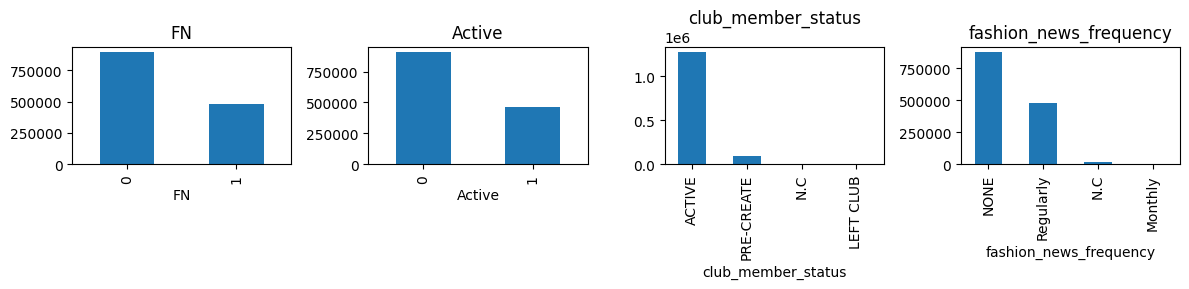

In [58]:
cols = ["FN", "Active", "club_member_status", "fashion_news_frequency"]
fig, axes = plt.subplots(nrows=1, ncols=len(cols), figsize=(12, 3), tight_layout=True)

for i, c in enumerate(cols):
  df_customer[c].value_counts().plot.bar(ax=axes[i], title=c)

<Axes: xlabel='age', ylabel='Count'>

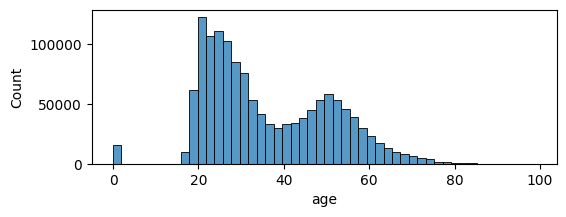

In [59]:
plt.figure(figsize=(6, 2))
sns.histplot(data=df_customer, x='age', bins=50)

By visualizing the distribution of the age, we can clearly see that:

there are two types of clients: between 20 & 40, and older than 40 yrs old.
the number of missing values isn’t too high


#### Article dataset

In [60]:
assert df_article.article_id.nunique() == df_article.shape[0]
describe_df(df_article)

,feature,type,# null,% null,# unique,% unique,sample
0,article_id,int64,0,0.0,105542,100.00,"[108775015, 108775044, 108775051, 110065001, 1..."
1,product_code,int64,0,0.0,47224,44.74,"[108775, 110065, 111565, 111586, 111593]"
2,prod_name,object,0,0.0,45875,43.47,"[Strap top, Strap top (1), OP T-shirt (Idro), ..."
3,product_type_no,int64,0,0.0,132,0.13,"[253, 306, 304, 302, 273]"
4,product_type_name,object,0,0.0,131,0.12,"[Vest top, Bra, Underwear Tights, Socks, Leggi..."
5,product_group_name,object,0,0.0,19,0.02,"[Garment Upper body, Underwear, Socks & Tights..."
6,graphical_appearance_no,int64,0,0.0,30,0.03,"[1010016, 1010017, 1010001, 1010010, 1010019]"
7,graphical_appearance_name,object,0,0.0,30,0.03,"[Solid, Stripe, All over pattern, Melange, Tra..."
8,colour_group_code,int64,0,0.0,50,0.05,"[9, 10, 11, 12, 13]"
9,colour_group_name,object,0,0.0,50,0.05,"[Black, White, Off White, Light Beige, Beige]"


No null values so starting with EDA

In [61]:
long_df = pd.DataFrame(df_article.groupby('product_type_name')['article_id'].count().reset_index().rename({'article_id': 'count'}, axis=1))
fig = px.bar(long_df, x='product_type_name', y="count", color='product_type_name', title=f"bar plot for product_type_name ", width=900, height=550)
fig.show()

In [62]:
long_df = pd.DataFrame(df_article.groupby('product_group_name')['article_id'].count().reset_index().rename({'article_id': 'count'}, axis=1))
fig = px.bar(long_df, x='product_group_name', y="count", color='product_group_name', title=f"bar plot for product_group_name ", width=900, height=550)
fig.show()

In [63]:
long_df = pd.DataFrame(df_article.groupby('graphical_appearance_name')['article_id'].count().reset_index().rename({'article_id': 'count'}, axis=1))
fig = px.bar(long_df, x='graphical_appearance_name', y="count", color='graphical_appearance_name', title=f"bar plot for graphical_appearance_name ", width=900, height=550)
fig.show()

### TRansactions

In [64]:
df_transaction["t_dat"].dt.year.unique()

array([2018, 2019, 2020])

In [65]:
df_transaction['month'] = df_transaction["t_dat"].dt.month
df_transaction['year'] = df_transaction["t_dat"].dt.year
df_transaction['dow'] = df_transaction["t_dat"].dt.day_name()

df_temp = df_transaction.groupby('t_dat')['price'].agg(['sum', 'mean']).sort_values(by = 't_dat', ascending=False).reset_index()
px.line(df_temp, x='t_dat', y='sum', title='Total Sales daily', width=900, height=450).show()

Spikes in daily sales is explained by the highly promoted sales events such as can be black friday types

In [66]:
df_temp = df_transaction.groupby(['year', 'month']).count()["article_id"].reset_index().rename(columns={"article_id": "count"})
px.line(df_temp, x="month", y="count", color='year', width=900, height=350, markers=True)

Monthly sales shows that it is highest in summers

In [67]:
df_temp = df_transaction.groupby(["year", "month"]).agg({"price": "sum"}).reset_index()

px.histogram(
    df_temp,
    x="month",
    y="price",
    title='Monthly sells for each year',
    color='year',
    barmode='group',
    nbins=12,
    width=900,
    height=450
).show()

In [68]:
df_temp = df_transaction.groupby(["year", "dow"]).agg({"price": "sum"}).reset_index()

px.histogram(
    df_temp,
    x="dow",
    y="price",
    title='Daily sells for each year',
    color='year',
    barmode='group',
    nbins=10,
    width=900,
    height=450
).show()

Keeping only few month's data

In [69]:
df = df_transaction[(df_transaction.t_dat.dt.year == 2019) & (df_transaction.t_dat.dt.month.isin([5, 6, 7, 9]))]
df.shape

(6501193, 8)

In [70]:
df = df.merge(df_article[["article_id", "index_group_name", "index_name", "section_name"]], on='article_id')
df.drop(columns=["article_id"], inplace=True)#, "month", "year"])
#del df_article


df = df.merge(df_customer, on='customer_id')
df.drop(columns=["customer_id"], inplace=True)
#del df_customer


# df.drop(columns=["postal_code"], inplace=True)
df['month'] = df.t_dat.dt.month
# df['year'] = df.t_dat.dt.year
df['dow'] = df.t_dat.dt.day_name
print(f"Total Memory Usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")
df.head()

Total Memory Usage: 2751.01 MB


,t_dat,price,sales_channel_id,month,year,dow,index_group_name,index_name,section_name,FN,Active,club_member_status,fashion_news_frequency,age
0,2019-05-01,0.050831,2,5,2019,<bound method PandasDelegate._add_delegate_acc...,Divided,Divided,Ladies Denim,0,0,PRE-CREATE,NONE,55
1,2019-05-01,0.050831,2,5,2019,<bound method PandasDelegate._add_delegate_acc...,Ladieswear,Ladieswear,Womens Everyday Collection,0,0,PRE-CREATE,NONE,55
2,2019-05-01,0.016932,2,5,2019,<bound method PandasDelegate._add_delegate_acc...,Ladieswear,Lingeries/Tights,Womens Lingerie,0,0,PRE-CREATE,NONE,55
3,2019-05-01,0.033881,2,5,2019,<bound method PandasDelegate._add_delegate_acc...,Ladieswear,Ladieswear,Womens Everyday Collection,0,0,PRE-CREATE,NONE,55
4,2019-05-01,0.016932,2,5,2019,<bound method PandasDelegate._add_delegate_acc...,Ladieswear,Ladieswear,Womens Everyday Collection,0,0,PRE-CREATE,NONE,55


In [71]:
df['dow'] = df["t_dat"].dt.day_name()


def plot_var_accross_time(var):
  for time_scale in ['month', 'dow']:
    df_temp = df.groupby([time_scale, var]).count()["t_dat"].reset_index().rename(columns={"t_dat": "count"})
    px.line(df_temp, x=time_scale, y="count", color=var, width=900, height=350, markers=True, title=f'Evolution of transactions for different {var} for each {time_scale} over 2019').show()


plot_var_accross_time("index_group_name")

In [72]:
plot_var_accross_time("index_name")

In [73]:
df_transaction_article = df_transaction.merge(df_article[["article_id", "index_group_name", "index_name", "section_name"]], on='article_id')
df_transaction_article.drop(columns=["article_id"], inplace=True)#, "month", "year"])

In [74]:
df_transaction_article.head()

,t_dat,customer_id,price,sales_channel_id,month,year,dow,index_group_name,index_name,section_name
0,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,0.050831,2,9,2018,Thursday,Ladieswear,Lingeries/Tights,Womens Lingerie
1,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,0.030492,2,9,2018,Thursday,Ladieswear,Lingeries/Tights,Womens Lingerie
2,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,0.015237,2,9,2018,Thursday,Divided,Divided,Divided Selected
3,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,0.016932,2,9,2018,Thursday,Ladieswear,Ladieswear,Womens Everyday Collection
4,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,0.016932,2,9,2018,Thursday,Ladieswear,Ladieswear,Womens Everyday Collection


In [75]:
df_transaction_article['dow'] = df_transaction_article["t_dat"].dt.day_name()


def plot_var_accross_time(var):
  for time_scale in ['month', 'dow','year']:
    df_temp = df_transaction_article.groupby([time_scale, var]).count()["t_dat"].reset_index().rename(columns={"t_dat": "count"})
    px.line(df_temp, x=time_scale, y="count", color=var, width=900, height=350, markers=True, title=f'Evolution of transactions for different {var} for each {time_scale} over all').show()


plot_var_accross_time("index_group_name")

In [76]:
plot_var_accross_time("index_name")

In [77]:
df_transaction_article.shape

(31788324, 10)

In [78]:
df_all = df_transaction_article.merge(df_customer, on='customer_id')


In [79]:
df_all.drop(columns=["customer_id"], inplace=True)

In [80]:
df_all.head()

,t_dat,price,sales_channel_id,month,year,dow,index_group_name,index_name,section_name,FN,Active,club_member_status,fashion_news_frequency,age
0,2018-09-20,0.050831,2,9,2018,Thursday,Ladieswear,Lingeries/Tights,Womens Lingerie,0,0,ACTIVE,NONE,24
1,2018-09-20,0.030492,2,9,2018,Thursday,Ladieswear,Lingeries/Tights,Womens Lingerie,0,0,ACTIVE,NONE,24
2,2018-09-20,0.015237,2,9,2018,Thursday,Divided,Divided,Divided Selected,1,1,ACTIVE,Regularly,32
3,2018-09-20,0.016932,2,9,2018,Thursday,Ladieswear,Ladieswear,Womens Everyday Collection,1,1,ACTIVE,Regularly,32
4,2018-09-20,0.016932,2,9,2018,Thursday,Ladieswear,Ladieswear,Womens Everyday Collection,1,1,ACTIVE,Regularly,32


In [81]:
df_all.shape

(31788324, 14)

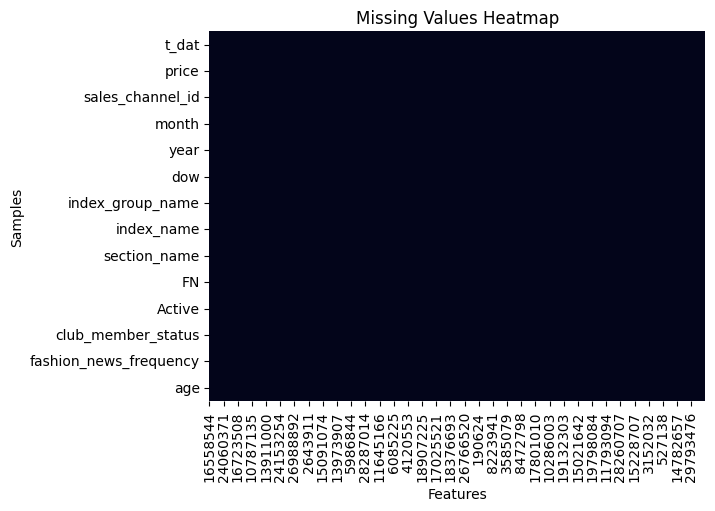

In [82]:
ax = plt.axes()
sample_df = df_all.sample(100000, random_state=42)  # adjust as needed
sns.heatmap(sample_df.isna().transpose(), ax=ax, cbar=False)
plt.xlabel('Features')
plt.ylabel('Samples')
plt.title('Missing Values Heatmap')
plt.show()

### Data for baseline model

In [87]:
df_articles = pd.read_csv('articles.csv')
df_customers = pd.read_csv('customers.csv')
df_transactions = pd.read_csv('transactions_train.csv')

In [89]:
assert df_articles.article_id.nunique() == df_articles.shape[0]


print(f"Nb of transactions before filtering: {df_transactions.shape[0]}")
df_transactions.t_dat = pd.to_datetime(df_transactions.t_dat, infer_datetime_format=True)
df = df_transactions[(df_transactions.t_dat.dt.year == 2019)] # & (df_transactions.t_dat.dt.month.isin([5, 6, 7]))] # DEBUG
print(f"Nb of transactions after filtering:  {df.shape[0]}")

df = df.merge(df_articles[["article_id", "index_group_name", "index_name", "section_name"]], on='article_id')

# del df_articles
# df = df.merge(df_customers, on='customer_id') # not needed
# del df_customers

Nb of transactions before filtering: 31788324


MemoryError: Unable to allocate 125. MiB for an array with shape (16396930, 1) and data type datetime64[ns]